In [1]:
using CSV, DataFrames
using PyPlot, LaTeXStrings, PyCall, Statistics, Distributions, Dierckx
using KernelDensity: kde
@pyimport numpy as np
@pyimport scienceplots

In [2]:
obs10deg = CSV.read("../MPC/observation/obs_10deg_EF.csv", DataFrame)
obs20deg = CSV.read("../MPC/observation/obs_20deg_EF.csv", DataFrame)
obs35deg = CSV.read("../MPC/observation/obs_35deg_EF.csv", DataFrame)

Row,time,u,v,r,x,y,ψ,x1,y1,x2,y2,δ,n_p,X_wind,Y_wind,N_wind,U_W,Ψ_W,X_F,Y_F,N_F
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,1.4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-3.0,0.0,0.610865,21.2182,-0.273438,-3.54939e-19,3.72686e-18,0.0,3.14159,0.0,0.0,0.0
2,1.0,1.41455,-0.0322616,0.0398929,1.4,0.0,0.0,4.4,0.0,-1.6,3.67394e-16,0.610865,21.2182,-0.282199,0.0118125,0.0193439,0.0,3.14159,0.0,0.0,0.0
3,2.0,1.42717,-0.0830315,0.0673596,2.81455,-0.0322616,0.0398929,5.81217,0.0873855,-0.183061,-0.151909,0.610865,21.2182,-0.292063,0.0329369,0.0523997,0.0,3.14159,0.0,0.0,0.0
4,3.0,1.43149,-0.142421,0.0897306,4.2439,-0.0583081,0.107253,7.22666,0.262833,1.26114,-0.379449,0.610865,21.2182,-0.299458,0.0611255,0.0941839,0.0,3.14159,0.0,0.0,0.0
5,4.0,1.42277,-0.203433,0.108455,5.68241,-0.0466746,0.196983,8.62439,0.54046,2.74042,-0.63381,0.610865,21.2182,-0.301617,0.0933164,0.139216,0.0,3.14159,0.0,0.0,0.0
6,5.0,1.39849,-0.259214,0.122627,7.11748,0.0322796,0.305438,9.97862,0.934414,4.25633,-0.869855,0.610865,21.2182,-0.296771,0.124719,0.180457,0.0,3.14159,0.0,0.0,0.0
7,6.0,1.35927,-0.303624,0.131195,8.52919,0.205605,0.428065,11.2585,1.45094,5.79988,-1.03973,0.610865,21.2182,-0.284798,0.149901,0.211101,0.0,3.14159,0.0,0.0,0.0
8,7.0,1.30906,-0.333474,0.13449,9.89185,0.493625,0.55926,12.4348,2.0853,7.34891,-1.09805,0.610865,21.2182,-0.267446,0.165397,0.227807,0.0,3.14159,0.0,0.0,0.0
9,8.0,1.25345,-0.349559,0.134149,11.1784,0.905487,0.69375,13.485,2.82376,8.87183,-1.01279,0.610865,21.2182,-0.247474,0.17126,0.231889,0.0,3.14159,0.0,0.0,0.0


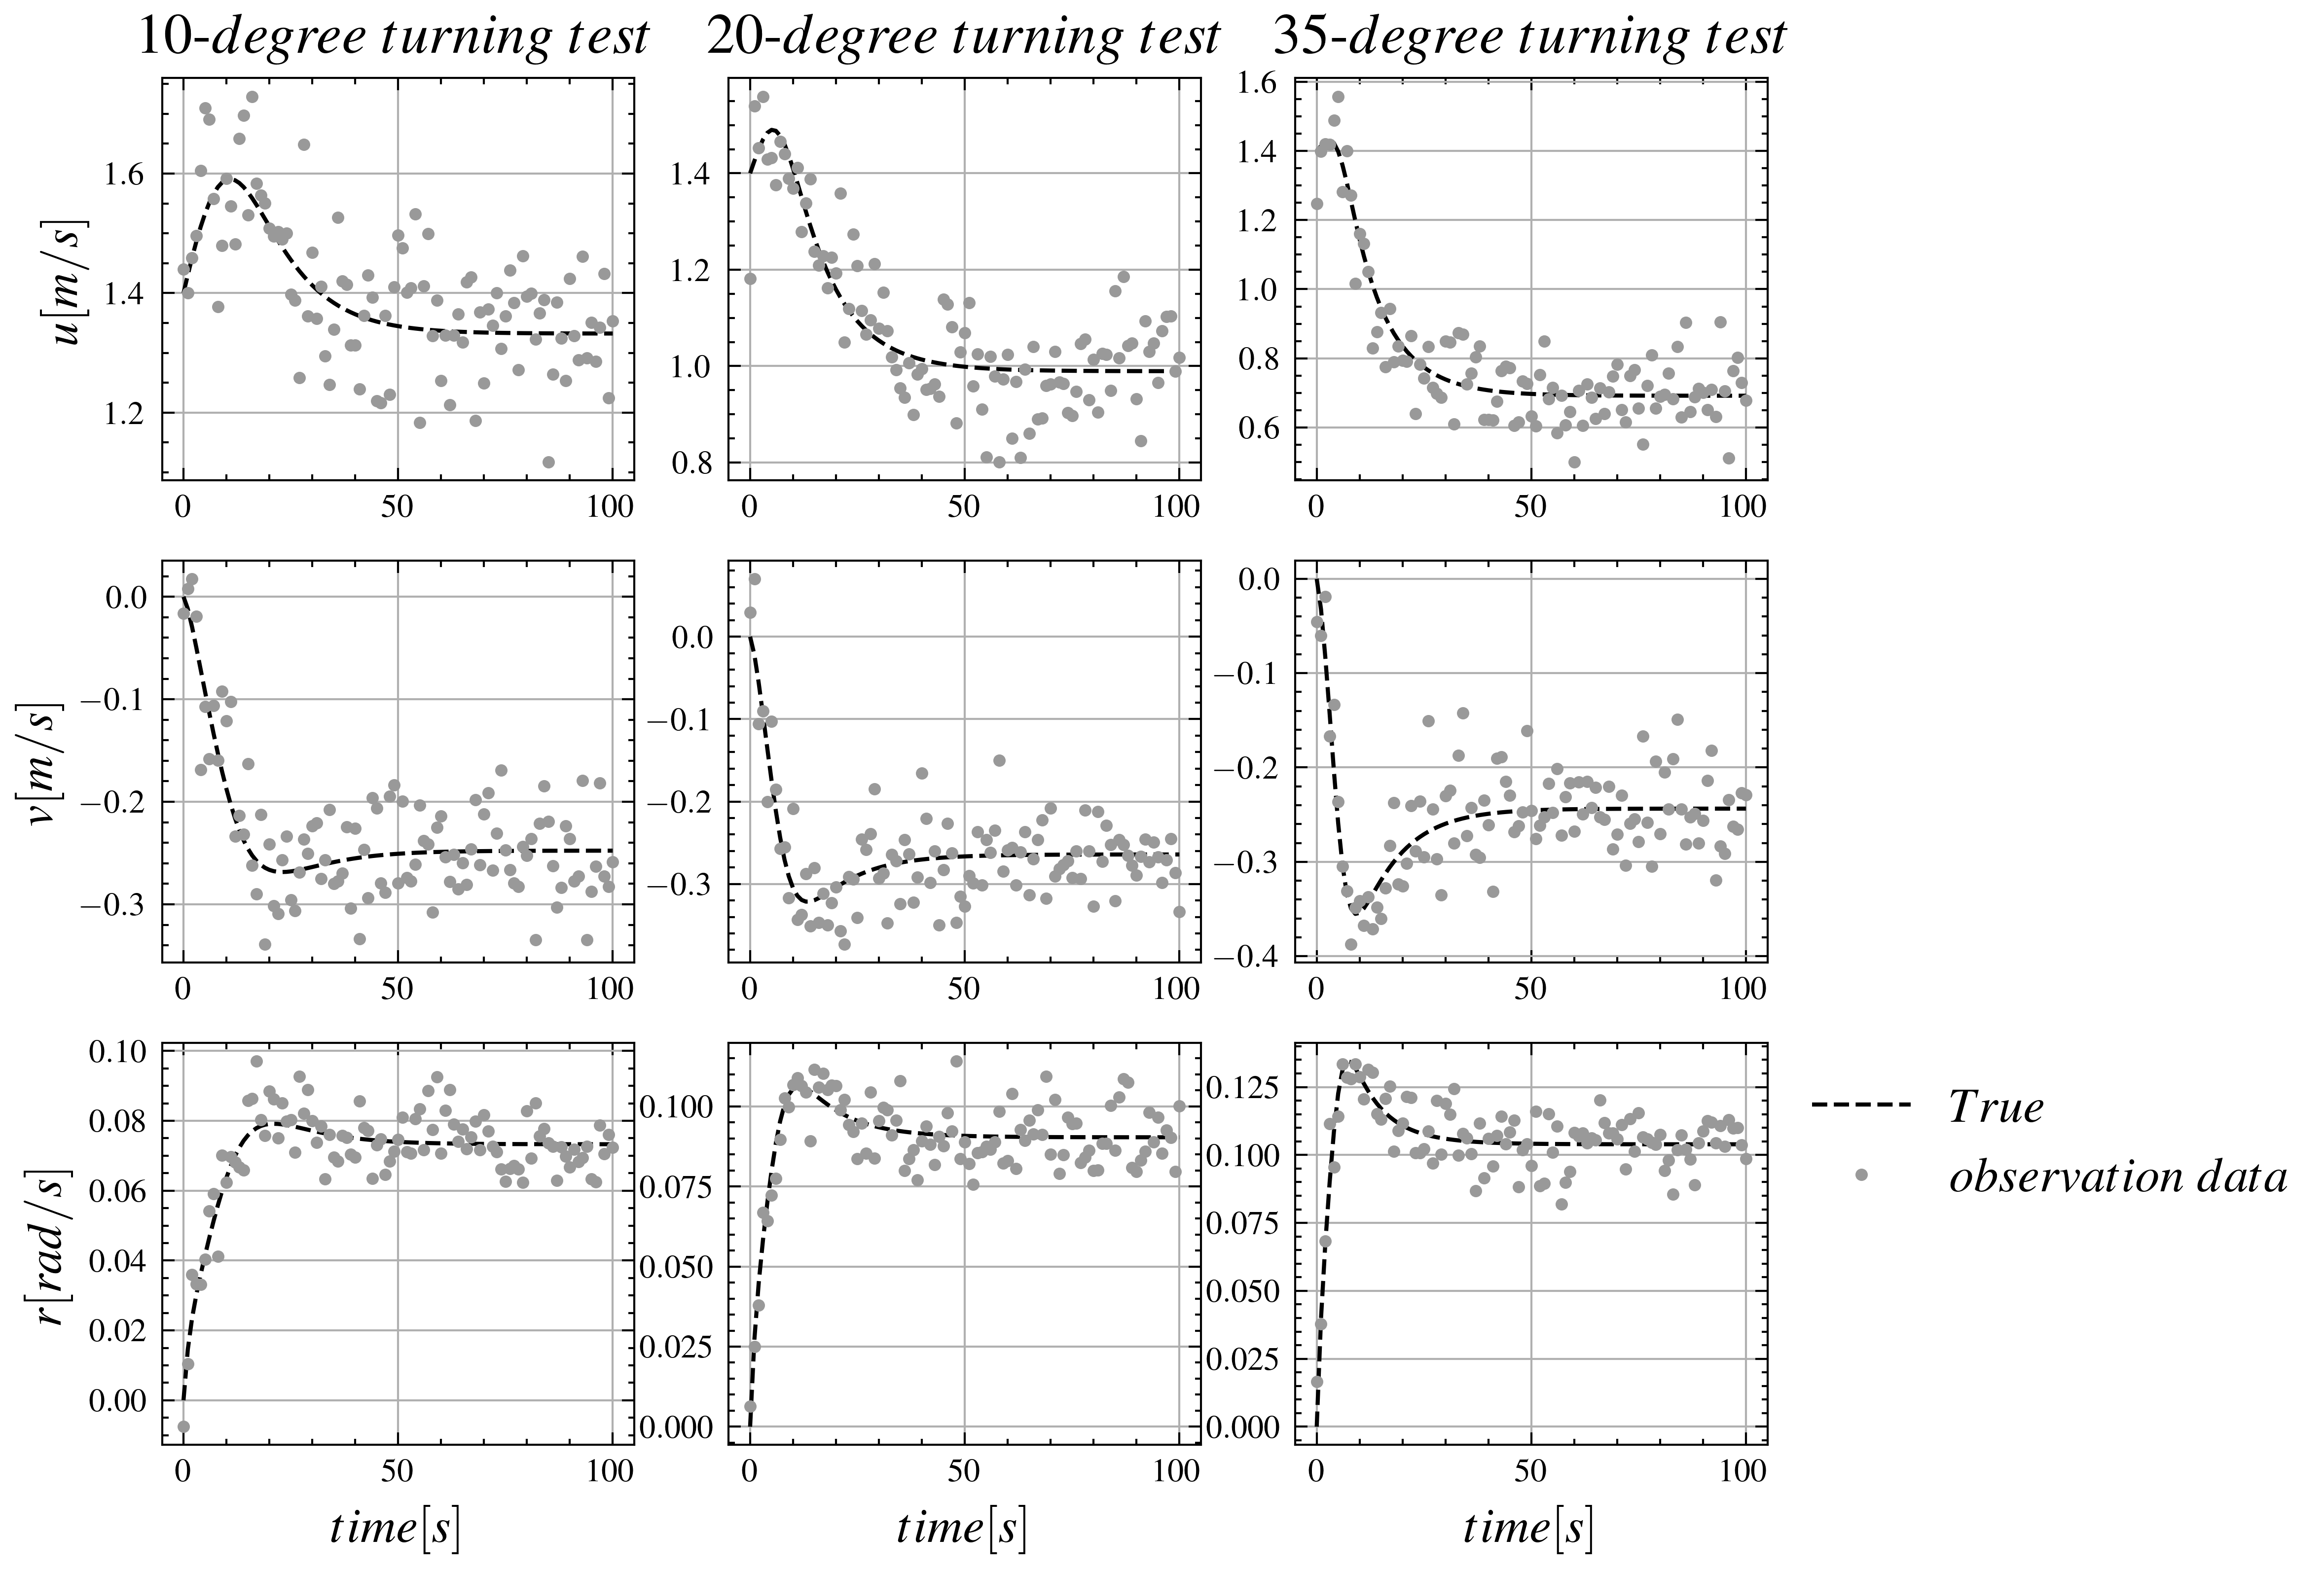

In [3]:
plt.style.use(["science", "ieee"])

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(3, 3, 1)
ax.set_title(L"10\mathchar`-degree~turning~test", fontsize=14)
ax.plot(obs10deg[!,"time"], obs10deg[!,"u"], "--", c="k", linewidth=1)
ax.plot(obs10deg[!,"time"], obs10deg[!,"u"].+rand(Normal(0.0,0.08), 101), "o", c="0.6", markersize=2)
ax.set_ylabel(L"$u [m/s]$", fontsize=12)
ax.grid()

ax = fig.add_subplot(3, 3, 4)
ax.plot(obs10deg[!,"time"], obs10deg[!,"v"],  "--", c="k", linewidth=1)
ax.plot(obs10deg[!,"time"], obs10deg[!,"v"].+rand(Normal(0.0,0.04), 101),  "o", c="0.6", markersize=2)
ax.set_ylabel(L"$v [m/s]$", fontsize=12)
ax.grid()

ax = fig.add_subplot(3, 3, 7)
ax.plot(obs10deg[!,"time"], obs10deg[!,"r"],  "--", c="k", linewidth=1)
ax.plot(obs10deg[!,"time"], obs10deg[!,"r"].+rand(Normal(0.0,0.008), 101),  "o", c="0.6", markersize=2)
ax.set_ylabel(L"$r [rad/s]$", fontsize=12)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()

ax = fig.add_subplot(3, 3, 2)
ax.set_title(L"20\mathchar`-degree~turning~test", fontsize=14)
ax.plot(obs20deg[!,"time"], obs20deg[!,"u"], "--", c="k", linewidth=1)
ax.plot(obs20deg[!,"time"], obs20deg[!,"u"].+rand(Normal(0.0,0.08), 101), "o", c="0.6", markersize=2)

ax.grid()

ax = fig.add_subplot(3, 3, 5)
ax.plot(obs20deg[!,"time"], obs20deg[!,"v"],  "--", c="k", linewidth=1)
ax.plot(obs20deg[!,"time"], obs20deg[!,"v"].+rand(Normal(0.0,0.04), 101),  "o", c="0.6", markersize=2)


ax.grid()

ax = fig.add_subplot(3, 3, 8)
ax.plot(obs20deg[!,"time"], obs20deg[!,"r"],  "--", c="k", linewidth=1)
ax.plot(obs20deg[!,"time"], obs20deg[!,"r"].+rand(Normal(0.0,0.008), 101),  "o", c="0.6", markersize=2)

ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()


ax = fig.add_subplot(3, 3, 3)
ax.set_title(L"35\mathchar`-degree~turning~test", fontsize=14)
ax.plot(obs35deg[!,"time"], obs35deg[!,"u"], "--", c="k", linewidth=1)
ax.plot(obs35deg[!,"time"], obs35deg[!,"u"].+rand(Normal(0.0,0.08), 101), "o", c="0.6", markersize=2)


ax.grid()

ax = fig.add_subplot(3, 3, 6)
ax.plot(obs35deg[!,"time"], obs35deg[!,"v"],  "--", c="k", linewidth=1)
ax.plot(obs35deg[!,"time"], obs35deg[!,"v"].+rand(Normal(0.0,0.04), 101),  "o", c="0.6", markersize=2)


ax.grid()

ax = fig.add_subplot(3, 3, 9)
ax.plot(obs35deg[!,"time"], obs35deg[!,"r"], label=L"True",  "--", c="k", linewidth=1)
ax.plot(obs35deg[!,"time"], obs35deg[!,"r"].+rand(Normal(0.0,0.008), 101), label=L"observation~data", "o", c="0.6", markersize=2)
ax.legend(bbox_to_anchor=(1, 1), fontsize=12)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()

display(fig)

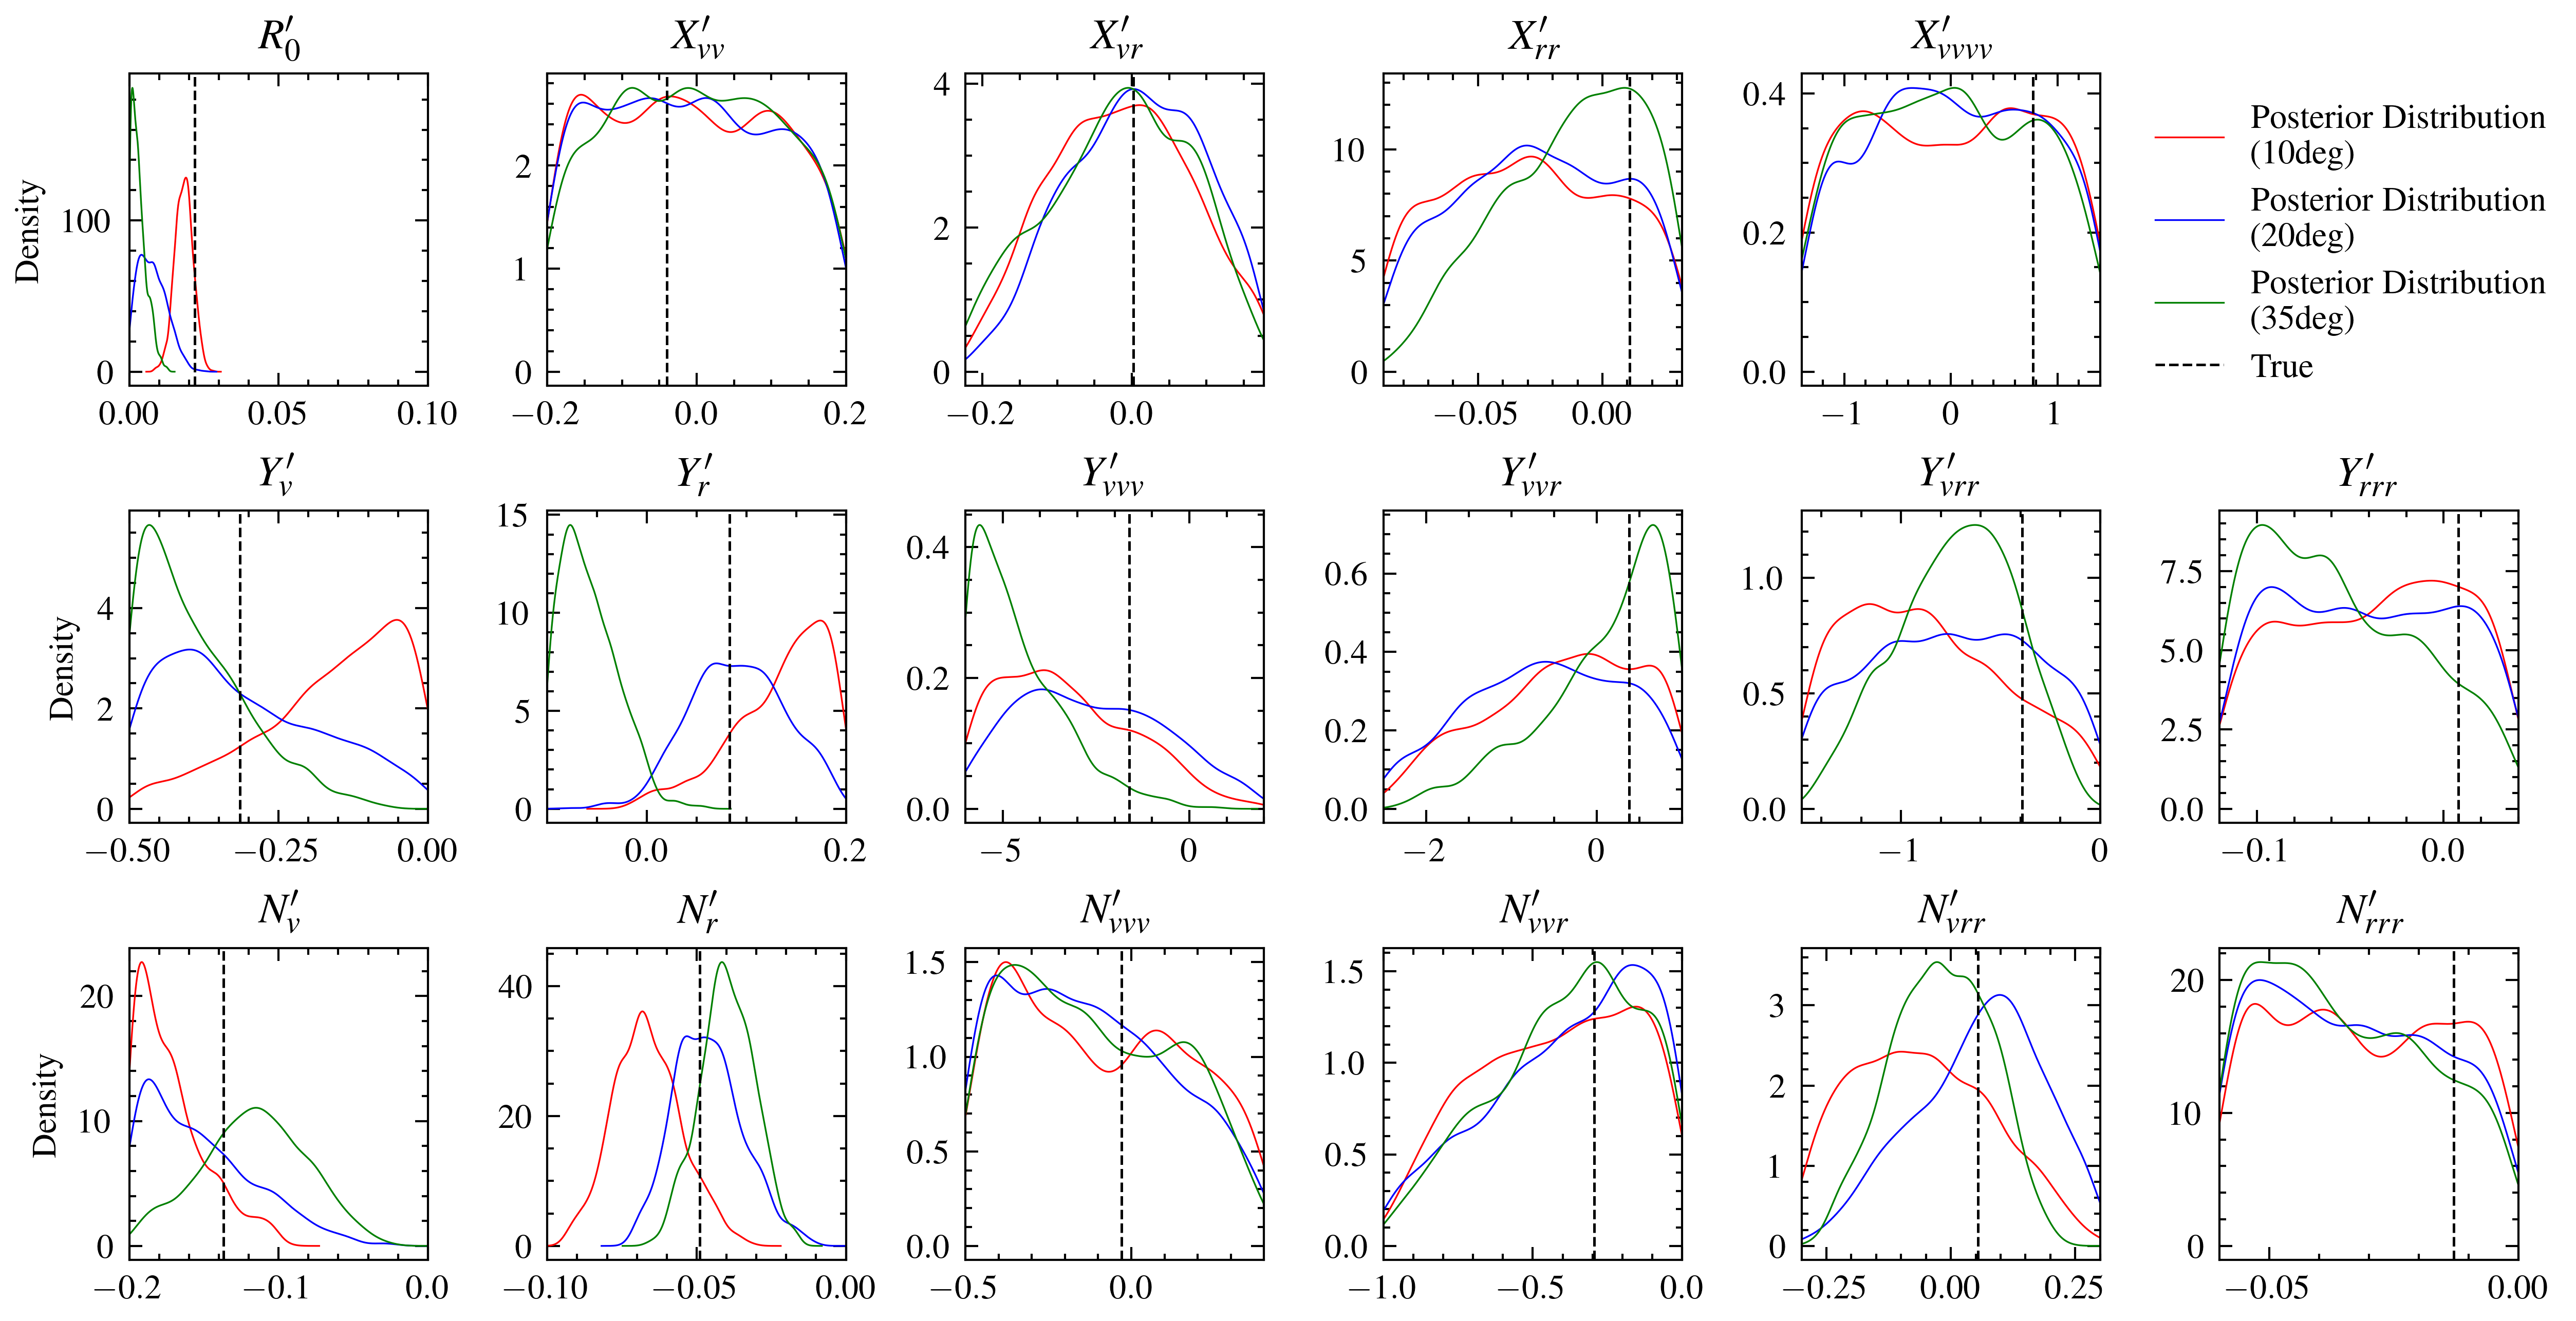

In [104]:
plt.style.use(["science", "ieee"])

# データの読み込み
data = CSV.read("../MCMC/result/10degL3MCMC_KVLCC2.csv", DataFrame)
data2 = CSV.read("../MCMC/result/20degL3MCMC_KVLCC2.csv", DataFrame)
data3 = CSV.read("../MCMC/result/35degL3MCMC_KVLCC2.csv", DataFrame)
fig = plt.figure(figsize=(10, 5))

start_num = 1
end_num = 1000
# R_0_dash
R_0_posterior = data.R_0[start_num:end_num]
R_0_posterior2 = data2.R_0[start_num:end_num]
R_0_posterior3 = data3.R_0[start_num:end_num]
kde_result = kde(R_0_posterior)
kde_result2 = kde(R_0_posterior2)
kde_result3 = kde(R_0_posterior3)
ax = fig.add_subplot(3, 6, 1)
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4)
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=0.022, c="k", linestyle="--", linewidth=0.6)
ax.set_ylabel(L"\textrm{Density}")
ax.set_title(L"R_0^{\prime}",fontsize=10)
ax.set_xlim(0.00, 0.10)

# X_vv_dash
X_vv_posterior = data.X_vv[start_num:end_num]
X_vv_posterior2 = data2.X_vv[start_num:end_num]
X_vv_posterior3 = data3.X_vv[start_num:end_num]
kde_result = kde(X_vv_posterior)
kde_result2 = kde(X_vv_posterior2)
kde_result3 = kde(X_vv_posterior3)
ax = fig.add_subplot(3, 6, 2)
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4)
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=-0.040, c="k", linestyle="--", linewidth=0.6)

ax.set_title(L"X_{vv}^{\prime}",fontsize=10)

ax.set_xlim(-0.20, 0.20)

# X_vr_dash
X_vr_posterior = data.X_vr[start_num:end_num]
X_vr_posterior2 = data2.X_vr[start_num:end_num]
X_vr_posterior3 = data3.X_vr[start_num:end_num]
kde_result = kde(X_vr_posterior)
kde_result2 = kde(X_vr_posterior2)
kde_result3 = kde(X_vr_posterior3)
ax = fig.add_subplot(3, 6, 3)
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4)
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=0.002, c="k", linestyle="--", linewidth=0.6)

ax.set_title(L"X_{vr}^{\prime}",fontsize=10)

ax.set_xlim(-0.223, 0.177)

# X_rr_dash
X_rr_posterior = data.X_rr[start_num:end_num]
X_rr_posterior2 = data2.X_rr[start_num:end_num]
X_rr_posterior3 = data3.X_rr[start_num:end_num]
kde_result = kde(X_rr_posterior)
kde_result2 = kde(X_rr_posterior2)
kde_result3 = kde(X_rr_posterior3)
ax = fig.add_subplot(3, 6, 4)
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4)
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=0.011, c="k", linestyle="--", linewidth=0.6)

ax.set_title(L"X_{rr}^{\prime}",fontsize=10)

ax.set_xlim(-0.088, 0.032)

# X_vvvv_dash
X_vvvv_posterior = data.X_vvvv[start_num:end_num]
X_vvvv_posterior2 = data2.X_vvvv[start_num:end_num]
X_vvvv_posterior3 = data3.X_vvvv[start_num:end_num]
kde_result = kde(X_vvvv_posterior)
kde_result2 = kde(X_vvvv_posterior2)
kde_result3 = kde(X_vvvv_posterior3)
ax = fig.add_subplot(3, 6, 5)
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4)
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=0.771, c="k", linestyle="--", linewidth=0.6)

ax.set_title(L"X_{vvvv}^{\prime}",fontsize=10)

ax.set_xlim(-1.40, 1.40)

# Y_v_dash
Y_v_posterior = data.Y_v[start_num:end_num]
Y_v_posterior2 = data2.Y_v[start_num:end_num]
Y_v_posterior3 = data3.Y_v[start_num:end_num]
kde_result = kde(Y_v_posterior)
kde_result2 = kde(Y_v_posterior2)
kde_result3 = kde(Y_v_posterior3)
ax = fig.add_subplot(3, 6, 7)
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4)
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=-0.315, c="k", linestyle="--", linewidth=0.6)
ax.set_ylabel(L"\textrm{Density}")
ax.set_title(L"Y_{v}^{\prime}",fontsize=10)

ax.set_xlim(-0.50, 0.00)

# Y_r_dash
Y_r_posterior = data.Y_r[start_num:end_num]
Y_r_posterior2 = data2.Y_r[start_num:end_num]
Y_r_posterior3 = data3.Y_r[start_num:end_num]
kde_result = kde(Y_r_posterior)
kde_result2 = kde(Y_r_posterior2)
kde_result3 = kde(Y_r_posterior3)
ax = fig.add_subplot(3, 6, 8)
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4)
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=0.083, c="k", linestyle="--", linewidth=0.6)

ax.set_title(L"Y_{r}^{\prime}",fontsize=10)

ax.set_xlim(-0.10, 0.20)

# Y_vvv_dash
Y_vvv_posterior = data.Y_vvv[start_num:end_num]
Y_vvv_posterior2 = data2.Y_vvv[start_num:end_num]
Y_vvv_posterior3 = data3.Y_vvv[start_num:end_num]
kde_result = kde(Y_vvv_posterior)
kde_result2 = kde(Y_vvv_posterior2)
kde_result3 = kde(Y_vvv_posterior3)
ax = fig.add_subplot(3, 6, 9)
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4)
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=-1.607, c="k", linestyle="--", linewidth=0.6)

ax.set_title(L"Y_{vvv}^{\prime}",fontsize=10)

ax.set_xlim(-6.00, 2.00)

# Y_vvr_dash
Y_vvr_posterior = data.Y_vvr[start_num:end_num]
Y_vvr_posterior2 = data2.Y_vvr[start_num:end_num]
Y_vvr_posterior3 = data3.Y_vvr[start_num:end_num]
kde_result = kde(Y_vvr_posterior)
kde_result2 = kde(Y_vvr_posterior2)
kde_result3 = kde(Y_vvr_posterior3)
ax = fig.add_subplot(3, 6, 10)
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4)
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=0.379, c="k", linestyle="--", linewidth=0.6)

ax.set_title(L"Y_{vvr}^{\prime}",fontsize=10)

ax.set_xlim(-2.50, 1.00)

# Y_vrr_dash
Y_vrr_posterior = data.Y_vrr[start_num:end_num]
Y_vrr_posterior2 = data2.Y_vrr[start_num:end_num]
Y_vrr_posterior3 = data3.Y_vrr[start_num:end_num]
kde_result = kde(Y_vrr_posterior)
kde_result2 = kde(Y_vrr_posterior2)
kde_result3 = kde(Y_vrr_posterior3)
ax = fig.add_subplot(3, 6, 11)
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4)
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=-0.391, c="k", linestyle="--", linewidth=0.6)

ax.set_title(L"Y_{vrr}^{\prime}",fontsize=10)

ax.set_xlim(-1.50, 0.00)

# Y_rrr_dash
Y_rrr_posterior = data.Y_rrr[start_num:end_num]
Y_rrr_posterior2 = data2.Y_rrr[start_num:end_num]
Y_rrr_posterior3 = data3.Y_rrr[start_num:end_num]
kde_result = kde(Y_rrr_posterior)
kde_result2 = kde(Y_rrr_posterior2)
kde_result3 = kde(Y_rrr_posterior3)
ax = fig.add_subplot(3, 6, 12)
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4)
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=0.008, c="k", linestyle="--", linewidth=0.6)

ax.set_title(L"Y_{rrr}^{\prime}",fontsize=10)

ax.set_xlim(-0.12, 0.04)

# N_v_dash
N_v_posterior = data.N_v[start_num:end_num]
N_v_posterior2 = data2.N_v[start_num:end_num]
N_v_posterior3 = data3.N_v[start_num:end_num]
kde_result = kde(N_v_posterior)
kde_result2 = kde(N_v_posterior2)
kde_result3 = kde(N_v_posterior3)
ax = fig.add_subplot(3, 6, 13)
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4)
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=-0.137, c="k", linestyle="--", linewidth=0.6)
ax.set_ylabel(L"\textrm{Density}")
ax.set_title(L"N_{v}^{\prime}",fontsize=10)

ax.set_xlim(-0.20, 0.00)

# N_r_dash
N_r_posterior = data.N_r[start_num:end_num]
N_r_posterior2 = data2.N_r[start_num:end_num]
N_r_posterior3 = data3.N_r[start_num:end_num]
kde_result = kde(N_r_posterior)
kde_result2 = kde(N_r_posterior2)
kde_result3 = kde(N_r_posterior3)
ax = fig.add_subplot(3, 6, 14)
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4)
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=-0.049, c="k", linestyle="--", linewidth=0.6)

ax.set_title(L"N_{r}^{\prime}",fontsize=10)

ax.set_xlim(-0.10, 0.00)

# N_vvv_dash 
N_vvv_posterior = data.N_vvv[start_num:end_num]
N_vvv_posterior2 = data2.N_vvv[start_num:end_num]
N_vvv_posterior3 = data3.N_vvv[start_num:end_num]
kde_result = kde(N_vvv_posterior) 
kde_result2 = kde(N_vvv_posterior2)
kde_result3 = kde(N_vvv_posterior3)
ax = fig.add_subplot(3, 6, 15) 
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4)
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=-0.030, c="k", linestyle="--", linewidth=0.6) 
 
ax.set_title(L"N_{vvv}^{\prime}",fontsize=10) 
 
ax.set_xlim(-0.50, 0.40) 
# N_vvr_dash 
N_vvr_posterior = data.N_vvr[start_num:end_num]
N_vvr_posterior2 = data2.N_vvr[start_num:end_num]
N_vvr_posterior3 = data3.N_vvr[start_num:end_num]
kde_result = kde(N_vvr_posterior) 
kde_result2 = kde(N_vvr_posterior2)
kde_result3 = kde(N_vvr_posterior3)
ax = fig.add_subplot(3, 6, 16) 
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4) 
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=-0.294, c="k", linestyle="--", linewidth=0.6) 
 
ax.set_title(L"N_{vvr}^{\prime}",fontsize=10) 
 
ax.set_xlim(-1.00, 0.00) 
# N_vrr_dash 
N_vrr_posterior = data.N_vrr[start_num:end_num]
N_vrr_posterior2 = data2.N_vrr[start_num:end_num]
N_vrr_posterior3 = data3.N_vrr[start_num:end_num]
kde_result = kde(N_vrr_posterior) 
kde_result2 = kde(N_vrr_posterior2)
kde_result3 = kde(N_vrr_posterior3)
ax = fig.add_subplot(3, 6, 17) 
ax.plot(kde_result.x, kde_result.density, c="r", linewidth=0.4) 
ax.plot(kde_result2.x, kde_result2.density,"-", c="b", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g", linewidth=0.4)
ax.axvline(x=0.055, c="k", linestyle="--", linewidth=0.6) 
 
ax.set_title(L"N_{vrr}^{\prime}",fontsize=10) 
 
ax.set_xlim(-0.30, 0.30)
# N_rrr_dash 
N_rrr_posterior = data.N_rrr[start_num:end_num]
N_rrr_posterior2 = data2.N_rrr[start_num:end_num]
N_rrr_posterior3 = data3.N_rrr[start_num:end_num]
kde_result = kde(N_rrr_posterior) 
kde_result2 = kde(N_rrr_posterior2)
kde_result3 = kde(N_rrr_posterior3)
ax = fig.add_subplot(3, 6, 18) 
ax.plot(kde_result.x, kde_result.density, c="r",label="Posterior~Distribution \n (10deg)", linewidth=0.4) 
ax.plot(kde_result2.x, kde_result2.density,"-", c="b",label="Posterior~Distribution \n (20deg)", linewidth=0.4)
ax.plot(kde_result3.x, kde_result3.density,"-", c="g",label="Posterior~Distribution \n (35deg)", linewidth=0.4)
ax.axvline(x=-0.013, c="k", linestyle="--", label="True", linewidth=0.6) 
ax.legend(bbox_to_anchor=(1.2, 3.8), fontsize=8)
ax.set_title(L"N_{rrr}^{\prime}",fontsize=10) 

ax.set_xlim(-0.06, 0.00) 
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)
display(fig)